In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import seaborn as sns
import pandas as pd
import os

sns.set_style('white')
sns.set_context('poster')


# Machine Learning with Python - scikit-learn

This is a general notebook that can be used to quickly dive into machine learning with python. It is not a running story, but rather an overview of functionalities within the Python machine learning stack. The order is the same as the order of appearance in the exercises, roughly. Much of the material here is adapted from [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas and a [workshop at SciPY 2016](https://github.com/amueller/scipy-2016-sklearn) by Sebastian Raschka and Andreas Mueller.

I have tried to not repeat much that is already in the exercises. This means you will often have to look at two places. Apologies for that.

Note that there is also a lot of valuable information in the documentation of the packages, and I have included a further reading section all the way at the end of this notebook. General explanation of algorithms is easy to Google and therefore is not discussed here. This is just a guide to using the scikit-learn APIs to actually *do* the work and use the algorithms. It is, nevertheless, not always a good idea to just use an algorithm if you do not at least understand the basic maths/stats behind it! There's a lot of links from this notebook out into the WWW, mostly to sklearn documentation (which includes a lot of examples).

In some cases, I define helper functions, or provide some useful structures to use, feel welcome to just copy-paste whatever you need. 

## Obtaining and creating data sets.
Obviously, machine learning is all about data analysis. Many of the algorithms are developed with some properties of data in mind, that with other existing techniques are not handled well. Therefore, many algorithms show their true force when applied to data sets with specific properties of features. There are a lot of data sets that are very commonly used and that you will find in pretty much every machine learning tutorial. We will stick to such standards here.

sklearn has a module for data creation and for data fetching: sklearn.datasets. In these, many routines start with:
- make\_: these make data sets, only some routines to create them are included.
- fetch\_: these download data sets from an online repository. They can be big.
- load\_: these are smaller data sets that come with the installation of scikit-learn, they are loaded from disk.

Here are some examples of data sets that are used throughout this workshop.

In [2]:
from sklearn.datasets import make_blobs, load_iris, fetch_mldata 

How to specifiy what data you want is found in the documentation, that you either find by pressing alt-tab (or two or three times tab for other layouts) within the function call, or from the [sklearn site](http://scikit-learn.org/stable/datasets/index.html). We use a fairly small set in this workshop, but you should at some point take some time to look through all possibilities. 

## Supervised learning: regression and classification

In supervised learning the task is to reproduce a known answer, which either be a floating point number (in regression) or a label of some kind (classification). There are various models to perform this task, and in the scikit-learn API they are structured by the type of modeling. Some that we use in the workshop are:
- sklearn.linear_model which contains linear models like linear regression and logistic regression and regressors like LASSO.
- sklearn.neighbors which contains k-nearest neighbor regression and classification
- sklearn.svm contains support vector machine models, a regressor and a classifier.
- sklearn.tree contains decision tree related functionalities.

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

These models all work as follows. The first thing you need to is to start an instance of the model object:

In [4]:
regressor = LinearRegression()

In that step an object is initialized that is able to do a regression. Nothing has been done yet. You can often specify some hyperparameters for the model, and some auxiliary extra information, like stuff for multi-threading if the object in question supports that. 

The number of attributes and methods that exist for that object instance change when you make it do something. Obviously, the "fit" method, that will do the heavy lifting of fitting the model, exists. Attributes that are created during fitting, like the fit coefficients, do not yet exist.

Fitting the model can be done with the method: regressor.fit(X, y)

An example:

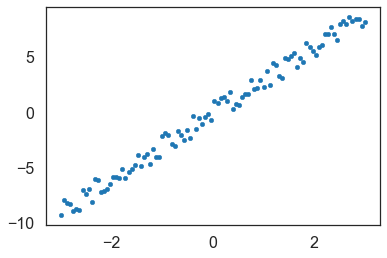

In [5]:
x = np.linspace(-3, 3, 100)            # one hundred points between x=-3 and x=3
rng = np.random.RandomState(42)        # Initialize a random state
scatter = rng.uniform(low=-1., high=1., size=len(x))   # Scatter is uniformly distributed between -1 and 1 
x = x[:, np.newaxis]                   # scikit-learn is made for multiple dimensions, you need a trick to do 1.
y = 3*x[:,0] + scatter
plt.scatter(x[:,0],y, s=20)

In [6]:
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, the regressor instance has more attributes, like:

In [7]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [8]:
regressor.coef_    # slope

array([ 3.00683077])

In [9]:
regressor.intercept_    # intercept

-0.059638513243581402

In [10]:
yfit = regressor.predict(x)   # performs the same as
y_fit = regressor.intercept_ + np.dot(regressor.coef_[0], x[:,0])

(yfit == y_fit).all()

True

This works very similar for all types of models, which is one of the major powers of scikit-learn: an incredible unity between all models, so that in practice it is easy to just replace the name of a model by another one, and all other code will work in the same way. This makes experimentation very easy.

### Classifiers are similar.

In [ ]:
# Create classes
yc = ['high' if i > 0 else 'low' for i in y]

In [ ]:
classifier = LogisticRegression()
classifier.fit(x, yc)

In [ ]:
labels = classifier.predict(x)


And if you want, you can just change LogisticRegression to SVC, and a whole different class of models is fit to your data. Thanks to the great effort of scikit-learn dev team, switching from model to model is as painless as it gets.

For both regressors and classifiers, all parameters that you would need to reproduce this regressor/model with the same data are stored as attributes. There are also some helper variables that can come in handy in the analysis of your results. Just type in the name of your instance followed by a period, then tab and the full list will show up! Most notably: classification algorithms usually estimate the probabilities of all possible labels. The highest will be returned as the prediction, but all probabilities can be calculated by the method "predict_proba", which also has a logithmis variant. It returns a n_observations x n_labels array:

In [ ]:
classifier.predict_proba(x)
classifier.predict_log_proba(x);

## Visualizing a decision tree

One of the few shortcomings of the Python stack of machine learning functionalities is the lack of a decent visualizer for decision trees. Here is a solutions that works for most people, but unfortunately not for all. After having set up a tree, and fit it, you write out a "dot file", that with the system command "dot" will generate a tree figure:

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2)
plt.scatter(X[:,0], X[:,1], c=y)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

dotfile = open("data/example_tree.dot", 'w')
export_graphviz(tree, out_file = dotfile, feature_names = ['0', '1'])
dotfile.close()
os.system("dot -Tpng data/example_tree.dot -o example_tree.png")

If this finished without an error, there should be an image called example_tree.png in home, which should show up by evaluating this markdown cell again.
<img src="example_tree.png">

### Model selection, or "How well does your model do"? 

In order to guess how well your model performs, there is the "score" method, which compares a fit of (potentially new) data to an already fit instance of your model (it only works after fitting, of course) and compares it to the correct answer that you supply it as well.

To get used to some of the lingo of the field of machine learning, let's have a look at the measure of goodness-of-fit that is commonly usedin machine learning: $R^2$. In classification problems, $R^2$ comes down to the fraction of the objects that is correctly classified, while for continuous variables it is the fraction of the variance that is explained, or one minus the remaining variance:
$$ R^2 = 1 - \frac{\Sigma(y-y_\textrm{fit})^2}{\sigma^2} $$
where $\sigma^2 = \Sigma(y-y_\textrm{mean})^2$ is the variance of the original sample. The "score" method of scikit-learn objects (that exists after fitting and predicting) is precisely that. For classification problems, it is just the fraction of correctly predicted labels.

In [ ]:
classifier.score(x, yc)

When doing supervised learning, it is good practice to split your sample in two. A fairly large set to train the model on, and a smaller (random!!) subset to test your model on. Many ML techniques are prone to overfitting (and some may be good at underfitting) and having an independent subset to test whether your model actually fits that much worse than teh data that it has seen during training. This is also, of course, a much better predictor for the behavior on data that it has not seen before.

sklearn comes with some functionality to do just this:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, yc, test_size=0.25, random_state=42)

In the line above, the data sets x and y (which are assumed to be the input features and the target values, in the same order) are split in a training set of 75% of the data and a test set of 25% of the data. The input data are split in the same way, randomly.

The optional parameter random_state can be given in everything that involves some stochasticity, not setting it will result in a different value every time, setting it guarantees that the results can be reproduced, by using the same value.

## Unsupervised learning: dimensionality reduction, structure finding and clustering

In unsupervised learning there is no number or label to predict. Rather, in the features of the data you try to identify structure. Objects to do unsupervised learning will therefore not have a "predict" method. They can often be used to transform data, and will therefore get a transform method.

### Dimension reduction and structure finding
A well-known example of unsupervised learning is the Principal Component Analysis. It's goal is to rotate the axes of a data set such that data line up with new orthogonal axes optimally. It will result in components that, from the principal one downwards explain most of the variance. It is a fairly simple matrix multiplication problem and is fully deterministic.

Here is a quick example:

In [ ]:
from sklearn.decomposition import PCA   # import it
pca = PCA()                             # initialise the object, provide optional parameters
pca.fit(x)                              # fit the pca
x_t = pca.transform(x)                  # Transform a vector (no need to be the same as that you fitted on)
# Some models allow you to do the fitting and transformation in one step:
x_t = pca.fit_transform(x)


After transformation, the shape of the data is either the same or it has as many observations but fewer features, depending on the model and parameters you used. In the case of PCA, the components are ordered, so starting at zero you will get the most "import" features (i.e. the components that correspond to the vector describing most of the variance in the input data).

PCA is just a rotation of axes, so for multi-modal and/or non-linear data this may not perform as well. Manifold learning is something that can help, at significant computational cost. The API, though, is the same, as you might expect by now from the scikit-learn devs. Manifold learners can be found in sklearn.manifold:
    

In [ ]:
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding

And all the methods look similar to PCA in their API, so fit, transform and fit_transform work. There are, again, public attributes for all settings. If you also transform, it will return a transformed array of the input. 

### Clustering

Clustering algorithms find structure in your data, where structure is defined as groups of points that somehow show more similarity (or: a smaller "distance", where distance is not used in the strict spatial sense of the word) to one another than to points in the other clusters. Many clustering algorithms exist, some are more suitable for one problem, some for the other. The good thing of the sklearn API, again, is the great similarity between them.

In [ ]:
from sklearn.cluster import KMeans

cluster_finder = KMeans()  # Hyperparameters can be specified at initialization, or later, through the attributes.
cluster_finder.fit(X, y=y)   # Fit a cluste on features of X, where the observations have an optional label y
clusters = cluster_finder.fit_predict(X, y=y)  # Also return the cluster labels for X
clusters = cluster_finder.fit_transform()  # Compute clustering and transform X to cluster-distance space.


These all work for all clustering algorithms. Some have the proporty that observations may be outliers, and therefore are not assigned to any cluster. These will have label -1.

## Model validation and optimization

In the exercises, the **pipeline** is used. From the docs:

*Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.*

and

*The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘\_\_’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting to None.
*

The pipeline takes care of some potential propagation issues. This is also of great convenience when doing feature engineering! The pipeline can, for example, make one chain that does:
- data cleansing, like replacing NaNs, data imputation etc.
- data tarnsformation, e.g. taking the log, or make it a polynomial, creating numerical dummies for categorical data
- fitting one or more estimators
- combine them.

The example in the exercise shows how to do number two and three of that list.

## A helpful function to illustrate the workings of a Support Vector Classifier

Support Vector Machines use a bunch of observations (the "support vectors") to fit planes or manifolds. The following function helps you visualize the support vectors and teh decision boundary.

In [ ]:
# Helper function for the plot
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Silhouette analysis for clustering

In the ongoing quest to investigate how many clusters your algorithm should try to find, silhouette analysis may come in useful. The code below is fairly self-explanatory.

For n_clusters = 2 The average silhouette_score is : 0.704978749608
For n_clusters = 3 The average silhouette_score is : 0.588200401213
For n_clusters = 4 The average silhouette_score is : 0.650518663273
For n_clusters = 5 The average silhouette_score is : 0.563764690262
For n_clusters = 6 The average silhouette_score is : 0.450466629437


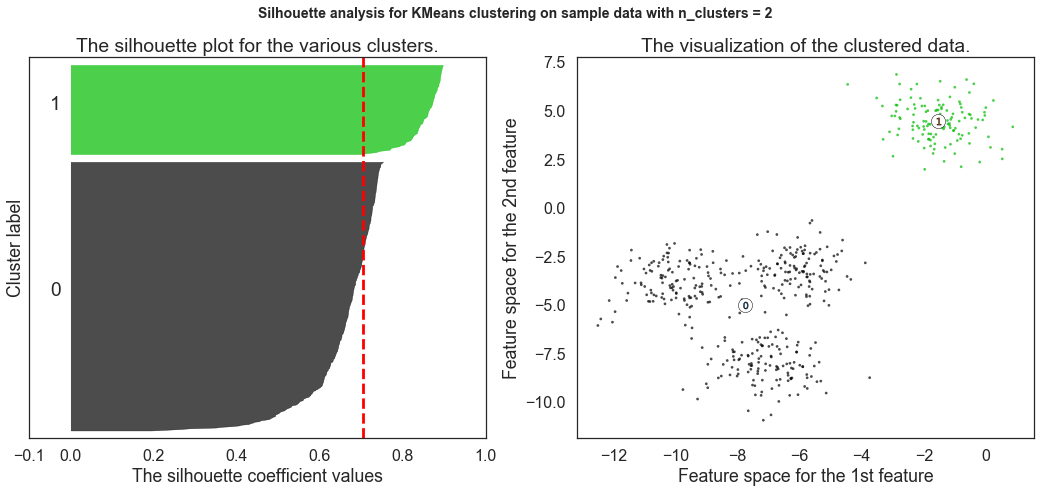

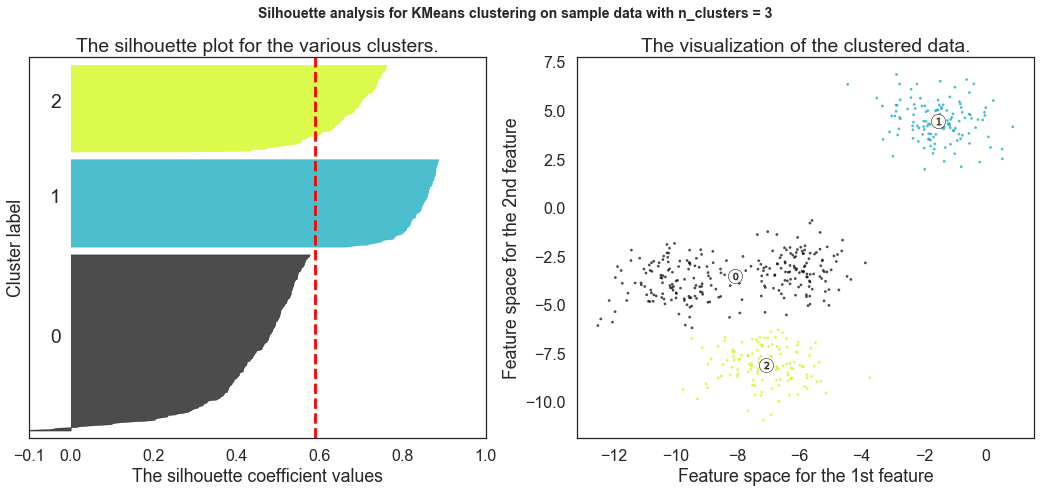

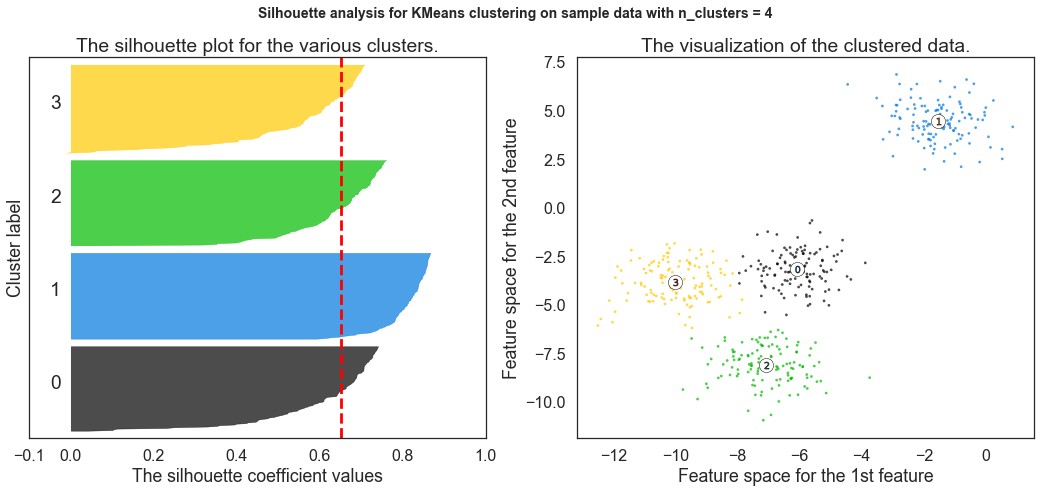

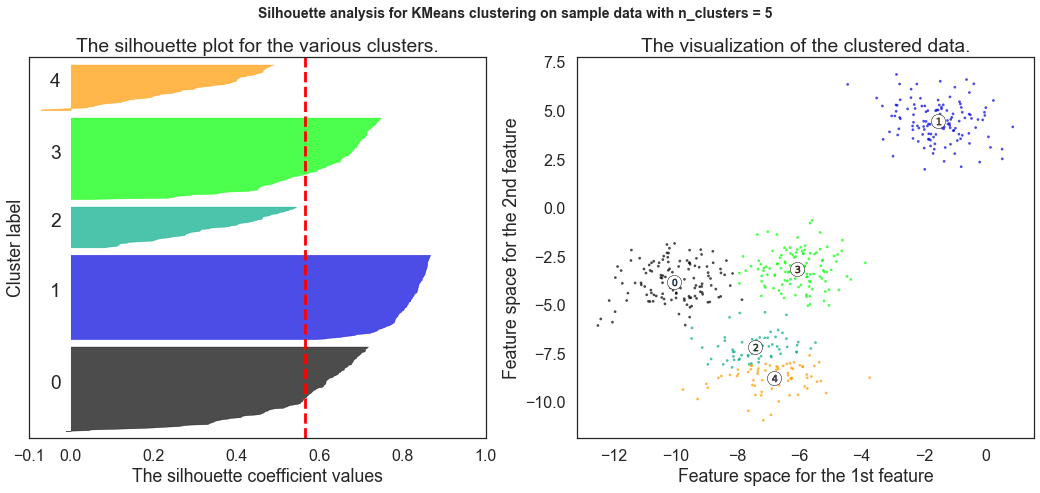

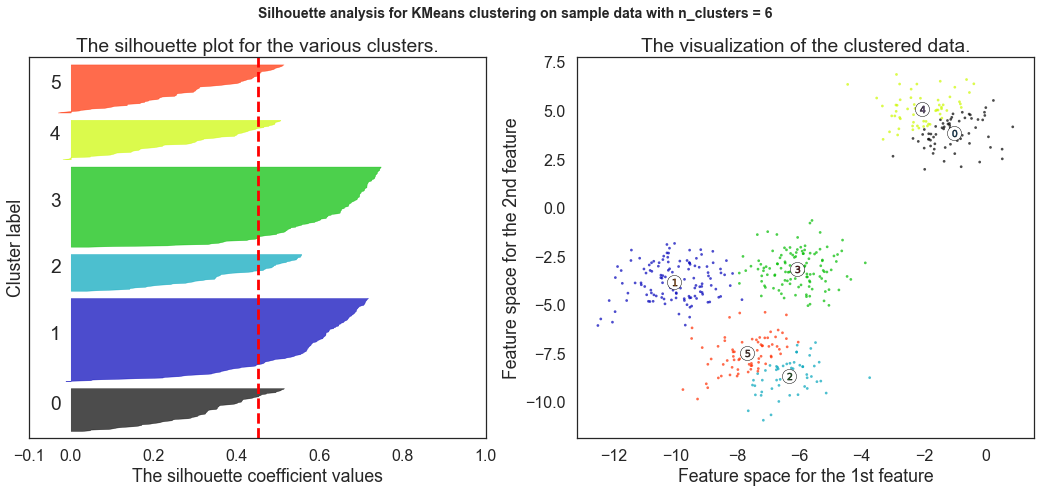

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


## Digit recognition with Tensorflow

Here is a full working example of a Tensorflow implementation of the digit recognizer. This may show how much more you ahve to do, on the one hand, but also how much more freedom there is in training models. There is a link to the docs below, and some comment in between the code. Note how all of your cpus are (likely) used... A good talk on Slidedeck, explaining the structure of the code (well, other comparable code) by S. Raschka is [here](https://speakerdeck.com/rasbt/introduction-to-deep-learning-with-tensorflow-at-pydata-ann-arbor)

In [12]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for i in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.9192


In [13]:
# Now for multilayer
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#Second layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
                                        x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.14
step 100, training accuracy 0.9
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.88
step 500, training accuracy 0.96
step 600, training accuracy 1
step 700, training accuracy 0.92
step 800, training accuracy 0.96
step 900, training accuracy 0.96
step 1000, training accuracy 0.96
step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 1
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 0.96
test accuracy 0.9777


## Further reading, etc.
Finally, some hints for places to go to, when you want some more information, practice etc.

### Data science and machine learning books:
- [The elements of statistical learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) by Hastie, Tibshirani and Friendman. A whole book that is freely available with many algorithms discussed here, and many more, in a lot of mathematical detail. Great resource, but you will need to be comfortable with a lot of maths.
- The book that was used for inspiration and some of the code we used today: [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas is fully available on github, also in notebook format.
- [Python Machine Learning: machine learning and deep learning with Python, scikit-learn and Tensorflow](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939/ref=dp_ob_title_bk?dpID=41wDUrTO34L&preST=_SX218_BO1,204,203,200_QL40_&dpSrc=detail) by Sebastian Raschka and Vahid Mirjalili has just bee updated to the second edition. Thick volume focused on understanding the basics of the algorithms as well as the implementations of it. [Corresponding github repository](https://github.com/rasbt/python-machine-learning-book-2nd-edition)


### Other resources
- YouTube playlists of scipy and pydata conferences can easily be found. They often come with code/notebooks. Most notably, the workshop used here: [scipy 2016 workshop](https://github.com/amueller/scipy-2016-sklearn) by Raschka and Mueller. Videos: [Part 1](https://www.youtube.com/watch?v=OB1reY6IX-o) [Part 2](https://www.youtube.com/watch?v=Cte8FYCpylk)
- [Kaggle](https://www.kaggle.com/) is a website with data science competitions. It is a great resource on the variety of applications for machine learning. There is a large collection of data sets available as well. Furthermore, public kernels take you by the hand in analysing the data and doing the machine learning (as well as data preparation and all that). If you want some practice, make sure to head over here!
- The [scikit-learn doc pages](http://scikit-learn.org/stable/documentation.html) are some of the most complete document pages of packages I have seen so far. Full of working examples and explanation of the algorithms as well!
- If you want to dive head-first into doing all things the Tensorflow way, head over to their [website](https://www.tensorflow.org/).


